In [7]:
from ultralytics import YOLO
from roboflow import Roboflow
import os
import torch
import time
import glob

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

rf = Roboflow(api_key="enter_api_key")

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA RTX A2000 Laptop GPU


In [4]:
model = YOLO("yolov8n.pt")

In [30]:
# Download the assistive-only dataset

project = rf.workspace("hochschule-offenburg").project("assistive-devices")
version = project.version(8)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.90, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Assistive-devices-8 in yolov8:: 100%|██████████| 3680/3680 [00:02<00:00, 1457.08it/s]


In [7]:
# Download the combined dataset

project = rf.workspace("hochschule-offenburg").project("hirac-combined")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.90, to fix: `pip install ultralytics==8.0.196`


In [8]:
# Download the combined dataset x3

project = rf.workspace("hochschule-offenburg").project("hirac-combined")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.90, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to HIRAC-combined-3 in yolov8:: 100%|██████████| 6350/6350 [00:06<00:00, 996.06it/s] 


### 1. Test YOLO pretrained on COCO on the assistive dataset

In [1]:
baseline_results = model.val(data="D:/HIRAC_dataset/Assistive-devices-8/data.yaml", imgsz=640, save=True)
print(baseline_results)

NameError: name 'model' is not defined

: 

In [10]:
image_dir = "D:/HIRAC_dataset/Assistive-devices-8/test/images"

# Iterate over all image files in the directory
for image_name in os.listdir(image_dir):
    # Construct full path to the image
    image_path = os.path.join(image_dir, image_name)
    
    # Check if the file is an image
    if image_name.endswith(('.jpg', '.jpeg', '.png')):
        # Make predictions on the image and save the results
        results = model.predict(source=image_path, save=True)
        
        print(f"Processed: {image_name} - Saved results.")
    else:
        print(f"Skipped: {image_name} (not an image file)")


image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00250_JPG.rf.79422386597048196be8cb8045f3eacc.jpg: 640x640 (no detections), 7.8ms
Speed: 2.0ms preprocess, 7.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
Processed: DSC00250_JPG.rf.79422386597048196be8cb8045f3eacc.jpg - Saved results.

image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00260_JPG.rf.ddab0a917a1365d584b85030d1fa0493.jpg: 640x640 1 frisbee, 7.0ms
Speed: 10.3ms preprocess, 7.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
Processed: DSC00260_JPG.rf.ddab0a917a1365d584b85030d1fa0493.jpg - Saved results.

image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00273_JPG.rf.8f33a631cea67115c907f358ead902d2.jpg: 640x640 1 cup, 1 dining table, 9.0ms
Speed: 1.1ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
Pro

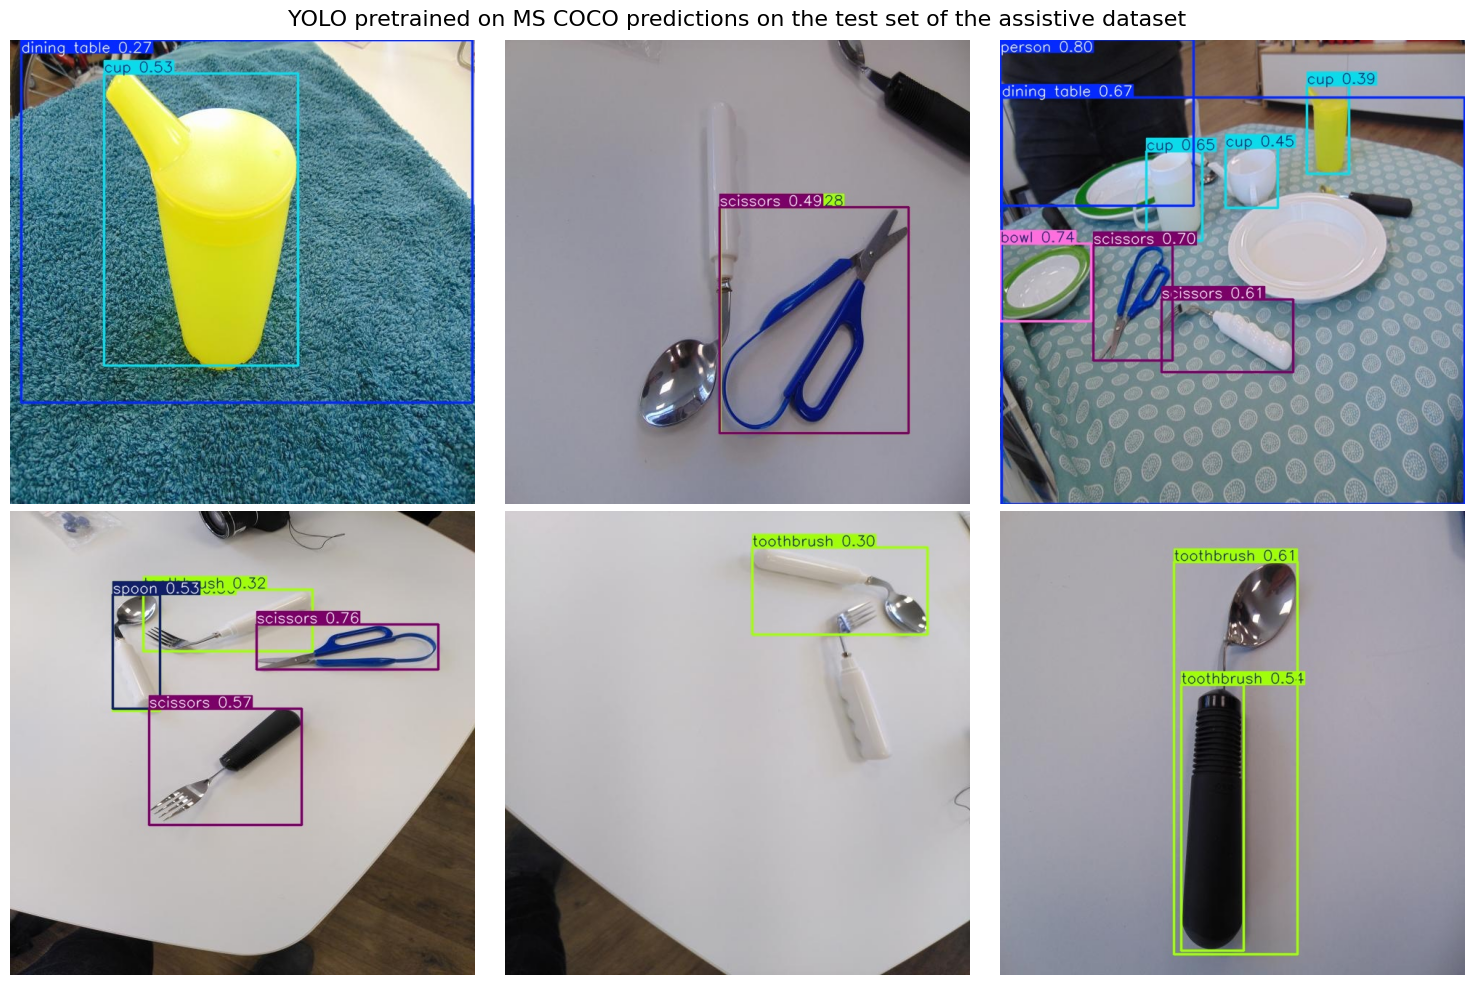

In [17]:
import matplotlib.pyplot as plt
from PIL import Image

# List of image paths
image_paths = [
    "D:/HIRAC_dataset/runs/detect/predict/DSC00273_JPG.rf.8f33a631cea67115c907f358ead902d2.jpg",
    "D:/HIRAC_dataset/runs/detect/predict/DSC00441_JPG.rf.08d9e834c5f6400fe6f869928a2887f3.jpg",
    "D:/HIRAC_dataset/runs/detect/predict/DSC00478_JPG.rf.26567f65a417dc43a96d9185036495a7.jpg",
    "D:/HIRAC_dataset/runs/detect/predict/IMG_20231219_104157_jpg.rf.f33d633c23e393e1fe58d83a2e1a3b6d.jpg",
    "D:/HIRAC_dataset/runs/detect/predict/IMG_20231219_104051_jpg.rf.20a5ede14f897ddabb22ed17caaa41f5.jpg",
    "D:/HIRAC_dataset/runs/detect/predict/DSC00450_JPG.rf.c52f38dd3043a12d1458479cb0759f0e.jpg"
]

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each image
for ax, img_path in zip(axes, image_paths):
    img = Image.open(img_path)  # Open the image
    ax.imshow(img)  # Show the image
    ax.axis('off')  # Hide axes

# Set a single title for the entire plot
fig.suptitle("YOLO pretrained on MS COCO predictions on the test set of the assistive dataset", fontsize=16)

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the plot


## 2. Training

### 2.1. Train YOLO on the assistive dataset

In [31]:
model = YOLO("yolov8n.pt")
assistive_model = model.train(data="D:/HIRAC_dataset/Assistive-devices-8/data.yaml", epochs=50, imgsz=640, patience=10)

New https://pypi.org/project/ultralytics/8.2.92 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/HIRAC_dataset/Assistive-devices-8/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fal

train: Scanning D:\HIRAC_dataset\Assistive-devices-8\train\labels... 1608 images, 18 backgrounds, 0 corrupt: 100%|██████████| 1608/1608 [00:00<00:00, 2016.36it/s]


train: New cache created: D:\HIRAC_dataset\Assistive-devices-8\train\labels.cache


val: Scanning D:\HIRAC_dataset\Assistive-devices-8\valid\labels... 151 images, 3 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<00:00, 1261.34it/s]

val: New cache created: D:\HIRAC_dataset\Assistive-devices-8\valid\labels.cache


Plotting labels to runs\detect\train11\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train11
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.24G     0.9627      2.336       1.16         45        640: 100%|██████████| 101/101 [03:08<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        151        428      0.614      0.571      0.565      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.28G     0.9748      1.584      1.144         41        640: 100%|██████████| 101/101 [02:59<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.69s/it]

                   all        151        428      0.646      0.655      0.678      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.25G     0.9714      1.435      1.148         40        640: 100%|██████████| 101/101 [02:20<00:00,  1.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        151        428      0.725      0.659      0.726      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.28G     0.9484      1.302      1.151         40        640: 100%|██████████| 101/101 [01:44<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        151        428      0.713       0.75      0.762      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.26G     0.9061       1.18      1.118         46        640: 100%|██████████| 101/101 [01:52<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.05it/s]

                   all        151        428        0.8      0.751      0.852      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.27G     0.9163      1.088      1.117         49        640: 100%|██████████| 101/101 [01:39<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.00it/s]

                   all        151        428      0.828       0.81      0.882      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.25G     0.8649      1.011      1.097         52        640: 100%|██████████| 101/101 [02:13<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]

                   all        151        428       0.89      0.806      0.888      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.23G     0.8271     0.9351      1.076         41        640: 100%|██████████| 101/101 [02:00<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

                   all        151        428      0.842      0.822      0.879       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.26G     0.8104     0.9191      1.071         33        640: 100%|██████████| 101/101 [01:55<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.15s/it]

                   all        151        428      0.864      0.825      0.908      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.24G     0.7982     0.8586      1.061         43        640: 100%|██████████| 101/101 [01:37<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]

                   all        151        428      0.875      0.825      0.915      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.25G     0.7892     0.8303       1.05         30        640: 100%|██████████| 101/101 [01:11<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        151        428      0.896      0.844      0.905      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.25G     0.7593     0.7778      1.041         36        640: 100%|██████████| 101/101 [01:05<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.38it/s]

                   all        151        428      0.922      0.878      0.932      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.25G     0.7641     0.7764      1.046         29        640: 100%|██████████| 101/101 [01:12<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.22it/s]

                   all        151        428      0.917      0.873      0.942      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.24G      0.736     0.7452      1.027         27        640: 100%|██████████| 101/101 [01:14<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]

                   all        151        428      0.879      0.844      0.924      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.25G     0.7142       0.71      1.018         30        640: 100%|██████████| 101/101 [01:31<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]

                   all        151        428      0.918      0.879      0.947      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.28G     0.7176     0.6939      1.025         37        640: 100%|██████████| 101/101 [01:25<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        151        428      0.915      0.907      0.952       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.25G     0.7085     0.6871      1.013         50        640: 100%|██████████| 101/101 [01:36<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.19it/s]

                   all        151        428      0.947      0.884      0.954      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.25G     0.6753      0.661      1.011         33        640: 100%|██████████| 101/101 [01:21<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.15it/s]

                   all        151        428      0.913       0.89       0.94      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.25G     0.6789     0.6557      1.008         29        640: 100%|██████████| 101/101 [01:31<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

                   all        151        428      0.916      0.891       0.95       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.25G     0.6812     0.6391      1.005         50        640: 100%|██████████| 101/101 [01:35<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.10it/s]

                   all        151        428      0.926      0.881       0.96      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.25G     0.6792     0.6221      1.008         32        640: 100%|██████████| 101/101 [01:27<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]

                   all        151        428       0.93      0.907      0.952      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.25G     0.6714     0.6231     0.9939         39        640: 100%|██████████| 101/101 [01:43<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.02s/it]

                   all        151        428      0.933        0.9      0.954      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.28G     0.6547     0.6125     0.9984         40        640: 100%|██████████| 101/101 [01:35<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.03it/s]

                   all        151        428      0.944      0.901      0.959       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.25G     0.6462     0.6048     0.9916         15        640: 100%|██████████| 101/101 [01:14<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.30it/s]

                   all        151        428      0.942       0.91      0.965      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.25G     0.6376     0.5818     0.9816         50        640: 100%|██████████| 101/101 [01:22<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.07s/it]

                   all        151        428      0.935      0.912      0.956       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.24G      0.638     0.5821     0.9875         32        640: 100%|██████████| 101/101 [01:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.26it/s]

                   all        151        428      0.927      0.937      0.968      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.25G     0.6199     0.5655     0.9713         27        640: 100%|██████████| 101/101 [01:14<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]

                   all        151        428      0.937      0.934      0.962      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.26G     0.6283     0.5748      0.982         36        640: 100%|██████████| 101/101 [01:15<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.33it/s]

                   all        151        428      0.956      0.925       0.97      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.28G     0.6247     0.5584      0.982         33        640: 100%|██████████| 101/101 [01:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.19s/it]

                   all        151        428      0.917      0.936      0.967       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.25G      0.607     0.5404     0.9743         52        640: 100%|██████████| 101/101 [01:48<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.04s/it]

                   all        151        428      0.945      0.923      0.969      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.25G     0.6099     0.5347     0.9742         45        640: 100%|██████████| 101/101 [01:32<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.21s/it]

                   all        151        428      0.931      0.939      0.968      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.26G     0.5856     0.5181     0.9644         78        640: 100%|██████████| 101/101 [01:32<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.08s/it]

                   all        151        428      0.959      0.926      0.966      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.26G      0.588     0.5151     0.9699         46        640: 100%|██████████| 101/101 [01:48<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]

                   all        151        428      0.941      0.929      0.971       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.25G     0.5757     0.4976     0.9566         48        640: 100%|██████████| 101/101 [01:42<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.03s/it]

                   all        151        428      0.955      0.917      0.973      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.25G     0.5675     0.4952     0.9598         39        640: 100%|██████████| 101/101 [01:31<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.05s/it]

                   all        151        428      0.952      0.941      0.975      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.25G     0.5791     0.5021     0.9626         52        640: 100%|██████████| 101/101 [01:28<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.16s/it]

                   all        151        428      0.955      0.935      0.976      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.25G     0.5602     0.4774      0.949         47        640: 100%|██████████| 101/101 [01:28<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]

                   all        151        428      0.969      0.906      0.976      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.25G      0.556     0.4763     0.9556         40        640: 100%|██████████| 101/101 [01:31<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.06it/s]

                   all        151        428      0.957      0.917      0.975      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.25G     0.5474     0.4635     0.9417         39        640: 100%|██████████| 101/101 [01:26<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.17s/it]

                   all        151        428      0.949      0.941      0.976      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.25G     0.5503     0.4679     0.9494         33        640: 100%|██████████| 101/101 [01:21<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

                   all        151        428      0.956       0.94      0.979      0.885


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.25G      0.411     0.3181     0.8545         17        640: 100%|██████████| 101/101 [01:49<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.14s/it]

                   all        151        428      0.961      0.934      0.974      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.24G     0.4112     0.3115     0.8546         51        640: 100%|██████████| 101/101 [01:43<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.09s/it]

                   all        151        428      0.971      0.911      0.975      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.25G     0.3951     0.3035     0.8524         39        640: 100%|██████████| 101/101 [01:29<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]

                   all        151        428      0.951      0.929      0.976      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.25G     0.3894     0.2976     0.8436         28        640: 100%|██████████| 101/101 [01:34<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.10s/it]

                   all        151        428       0.96      0.928      0.976      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.25G     0.3815       0.29     0.8411         26        640: 100%|██████████| 101/101 [01:08<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.27it/s]

                   all        151        428      0.951      0.938      0.977      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.24G     0.3731     0.2792     0.8358         18        640: 100%|██████████| 101/101 [01:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        151        428      0.942      0.948      0.977      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.25G     0.3704     0.2791     0.8371         15        640: 100%|██████████| 101/101 [01:03<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.31it/s]

                   all        151        428      0.928      0.962      0.977        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.25G     0.3613     0.2713     0.8325         23        640: 100%|██████████| 101/101 [01:23<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]

                   all        151        428       0.95      0.947      0.977      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.25G     0.3583     0.2696     0.8322         20        640: 100%|██████████| 101/101 [01:02<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.55it/s]

                   all        151        428      0.968      0.932      0.978        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.24G     0.3543     0.2649     0.8312         30        640: 100%|██████████| 101/101 [01:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        151        428      0.975      0.925      0.979      0.904



50 epochs completed in 1.394 hours.
Optimizer stripped from runs\detect\train11\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train11\weights\best.pt, 6.3MB

Validating runs\detect\train11\weights\best.pt...
Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


                   all        151        428      0.973      0.922      0.979      0.903
                   cup        100        158      0.989      0.924      0.969      0.912
                  fork         63        102      0.948      0.892       0.97      0.864
              scissors         47         47      0.964      0.957      0.989      0.924
                 spoon         71        121      0.991      0.916      0.987      0.913
Speed: 0.4ms preprocess, 11.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs\detect\train11


### 2.2. Train YOLO on the combined dataset

##### 2.2.1. Combined x2

The Precision Confidence Curve didn't yet converge and it can be left to train for a few more epochs. There is more variability in this dataset, possibly demanding more training time for the model to converge.

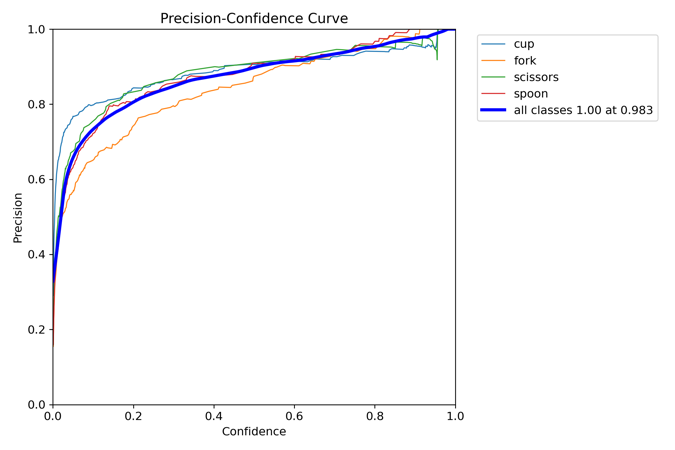

In [17]:
image = Image.open("D:/HIRAC_dataset/runs/detect/train10/P_curve.png")
display(image.resize((int(image.width * 0.3), int(image.height * 0.3))))

In [18]:
model = YOLO("yolov8n.pt")
combined_model = model.train(data="D:/HIRAC_dataset/HIRAC-combined-1/data.yaml", epochs=50, imgsz=640, patience=10)

New https://pypi.org/project/ultralytics/8.2.92 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/HIRAC_dataset/HIRAC-combined-1/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

train: Scanning D:\HIRAC_dataset\HIRAC-combined-1\train\labels... 1840 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1840/1840 [00:00<00:00, 2210.43it/s]


train: New cache created: D:\HIRAC_dataset\HIRAC-combined-1\train\labels.cache


val: Scanning D:\HIRAC_dataset\HIRAC-combined-1\valid\labels... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<00:00, 1365.14it/s]

val: New cache created: D:\HIRAC_dataset\HIRAC-combined-1\valid\labels.cache


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train10
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.11G      1.032      2.542      1.227         59        640: 100%|██████████| 115/115 [01:15<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.10s/it]


                   all        270        712       0.54      0.431      0.451      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.19G      1.092      1.966      1.257         96        640: 100%|██████████| 115/115 [01:17<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.09s/it]

                   all        270        712      0.477      0.446      0.419      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.19G      1.127      1.856      1.277         61        640: 100%|██████████| 115/115 [01:35<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.26s/it]

                   all        270        712      0.472      0.453      0.417      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.15G       1.11      1.697      1.255         81        640: 100%|██████████| 115/115 [01:39<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.05it/s]

                   all        270        712      0.631      0.418       0.48      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.17G      1.089      1.602      1.253         62        640: 100%|██████████| 115/115 [01:32<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.06it/s]


                   all        270        712      0.587      0.556       0.56      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.17G      1.034      1.492       1.22         74        640: 100%|██████████| 115/115 [01:42<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:10<00:00,  1.11s/it]

                   all        270        712      0.561      0.563      0.569       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.19G      1.021      1.391      1.203         86        640: 100%|██████████| 115/115 [01:35<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.03s/it]

                   all        270        712      0.749      0.619      0.695      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       2.2G     0.9782       1.33      1.194         84        640: 100%|██████████| 115/115 [01:31<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.18it/s]

                   all        270        712      0.764      0.633      0.713      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.2G     0.9802      1.293      1.188         54        640: 100%|██████████| 115/115 [00:57<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.35it/s]

                   all        270        712      0.745      0.699      0.751      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.2G     0.9389      1.218       1.17         71        640: 100%|██████████| 115/115 [01:13<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]

                   all        270        712      0.795      0.642      0.749      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.25G     0.9164      1.171      1.151        102        640: 100%|██████████| 115/115 [00:59<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.30it/s]

                   all        270        712      0.776      0.621      0.721      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.19G     0.9023      1.129      1.148         61        640: 100%|██████████| 115/115 [00:50<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]

                   all        270        712      0.833      0.684      0.772      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.2G     0.8948      1.103      1.137        107        640: 100%|██████████| 115/115 [00:59<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]

                   all        270        712      0.839       0.66      0.787      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.19G     0.8779      1.086      1.134         57        640: 100%|██████████| 115/115 [00:47<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.54it/s]

                   all        270        712      0.822      0.708      0.804      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.19G     0.8567      1.037      1.125         71        640: 100%|██████████| 115/115 [00:48<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]

                   all        270        712      0.837      0.695      0.793      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.19G     0.8691       1.04      1.127         75        640: 100%|██████████| 115/115 [00:49<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.54it/s]

                   all        270        712      0.816      0.732      0.813      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.18G     0.8284     0.9981      1.103         80        640: 100%|██████████| 115/115 [00:53<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.58it/s]

                   all        270        712      0.877      0.703      0.819      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       2.2G     0.8325     0.9742      1.112         62        640: 100%|██████████| 115/115 [00:34<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all        270        712      0.864      0.684      0.799       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.2G       0.81     0.9586      1.084         66        640: 100%|██████████| 115/115 [00:47<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.41it/s]

                   all        270        712      0.797      0.745      0.815      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.19G     0.7988     0.9129      1.087         70        640: 100%|██████████| 115/115 [00:51<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.50it/s]

                   all        270        712      0.849      0.728      0.827      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.19G     0.8001     0.9109      1.078         63        640: 100%|██████████| 115/115 [00:47<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]

                   all        270        712      0.844      0.733       0.82      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.17G     0.7867     0.8739      1.072         57        640: 100%|██████████| 115/115 [00:55<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        270        712      0.831      0.764      0.829       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.19G     0.7821     0.8797      1.075         53        640: 100%|██████████| 115/115 [00:49<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]

                   all        270        712      0.835      0.742      0.835      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.17G     0.7687     0.8579      1.071         81        640: 100%|██████████| 115/115 [00:52<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]

                   all        270        712       0.83      0.774      0.842      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.19G     0.7584     0.8314      1.064         73        640: 100%|██████████| 115/115 [00:41<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.80it/s]

                   all        270        712      0.897      0.729       0.84      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.19G     0.7375     0.7904      1.047         80        640: 100%|██████████| 115/115 [00:47<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]

                   all        270        712      0.914      0.706      0.825      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.19G     0.7274      0.793      1.045         65        640: 100%|██████████| 115/115 [00:58<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all        270        712      0.908      0.739      0.847      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.19G     0.7302     0.7811      1.043         69        640: 100%|██████████| 115/115 [01:02<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.57it/s]

                   all        270        712       0.86      0.764      0.841      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.19G     0.7175     0.7577      1.041         58        640: 100%|██████████| 115/115 [01:04<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]

                   all        270        712      0.888      0.754      0.853      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.19G      0.719     0.7528      1.037         59        640: 100%|██████████| 115/115 [00:44<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        270        712      0.908      0.766      0.858      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.17G     0.7182     0.7637      1.042         63        640: 100%|██████████| 115/115 [00:53<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]

                   all        270        712       0.89      0.743      0.848      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       2.2G     0.6969     0.7283      1.028         65        640: 100%|██████████| 115/115 [00:55<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        270        712      0.851      0.791       0.85      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.21G     0.6966     0.7111       1.03         85        640: 100%|██████████| 115/115 [00:46<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.38it/s]

                   all        270        712      0.905       0.75      0.852      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.16G     0.6865     0.6985       1.02         82        640: 100%|██████████| 115/115 [00:53<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

                   all        270        712      0.845      0.789      0.847       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.19G     0.6849     0.6796      1.021         67        640: 100%|██████████| 115/115 [00:45<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]

                   all        270        712      0.874      0.777      0.852      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.17G     0.6795     0.6818      1.013         65        640: 100%|██████████| 115/115 [00:55<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]

                   all        270        712      0.899      0.775      0.865      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.19G     0.6601     0.6493      1.005         90        640: 100%|██████████| 115/115 [00:48<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]

                   all        270        712      0.888      0.784      0.857      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.19G     0.6616     0.6616      1.011         93        640: 100%|██████████| 115/115 [00:38<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

                   all        270        712      0.918      0.762      0.865      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.19G     0.6571     0.6576      1.005         44        640: 100%|██████████| 115/115 [00:33<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]

                   all        270        712      0.891      0.772      0.872      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.2G     0.6364     0.6198     0.9885         59        640: 100%|██████████| 115/115 [00:42<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all        270        712      0.856        0.8      0.866      0.741


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.15G     0.5094     0.4619     0.9139         58        640: 100%|██████████| 115/115 [01:04<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.54it/s]

                   all        270        712      0.907      0.762      0.857      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.17G     0.5021     0.4416     0.9111         45        640: 100%|██████████| 115/115 [01:08<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.27it/s]

                   all        270        712      0.874      0.792      0.861      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.19G     0.4936     0.4185     0.9057         43        640: 100%|██████████| 115/115 [00:44<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]

                   all        270        712      0.871      0.801      0.868      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.17G     0.4841     0.4116     0.9013         37        640: 100%|██████████| 115/115 [01:06<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]

                   all        270        712      0.909      0.762      0.858      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.15G     0.4805     0.4038     0.8986         37        640: 100%|██████████| 115/115 [01:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        270        712      0.938      0.759      0.872      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.15G     0.4712      0.387     0.8946         33        640: 100%|██████████| 115/115 [01:03<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]

                   all        270        712      0.893      0.793      0.869      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.17G      0.458     0.3831     0.8887         31        640: 100%|██████████| 115/115 [01:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]

                   all        270        712      0.916      0.784      0.868      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.17G     0.4615     0.3757       0.89         37        640: 100%|██████████| 115/115 [00:54<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]

                   all        270        712      0.924      0.762      0.862      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.15G     0.4503     0.3654     0.8816         36        640: 100%|██████████| 115/115 [01:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]

                   all        270        712      0.909      0.785      0.865      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.17G     0.4416     0.3601     0.8775         30        640: 100%|██████████| 115/115 [00:48<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]

                   all        270        712      0.911      0.795       0.87      0.755



50 epochs completed in 0.926 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 6.3MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.72it/s]


                   all        270        712      0.908      0.786      0.865      0.756
                   cup        161        285      0.912      0.837      0.895      0.817
                  fork        109        159      0.893       0.78      0.865      0.742
              scissors         83         87      0.915      0.816      0.861      0.721
                 spoon        110        181       0.91      0.713      0.841      0.745
Speed: 0.4ms preprocess, 2.4ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs\detect\train10


##### 2.2.2. Combined x3

In [19]:
model = YOLO("yolov8n.pt")
combined_model = model.train(data="D:/HIRAC_dataset/HIRAC-combined-3/data.yaml", epochs=50, imgsz=640, patience=10)

New https://pypi.org/project/ultralytics/8.2.92 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/HIRAC_dataset/HIRAC-combined-3/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

train: Scanning D:\HIRAC_dataset\HIRAC-combined-3\train\labels... 2760 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2760/2760 [00:01<00:00, 1541.39it/s]


train: New cache created: D:\HIRAC_dataset\HIRAC-combined-3\train\labels.cache


val: Scanning D:\HIRAC_dataset\HIRAC-combined-3\valid\labels... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<00:00, 1202.49it/s]


val: New cache created: D:\HIRAC_dataset\HIRAC-combined-3\valid\labels.cache
Plotting labels to runs\detect\train13\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train13
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.29G      1.027      2.403      1.211         49        640: 100%|██████████| 173/173 [00:39<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.80it/s]

                   all        270        712       0.61      0.474      0.503      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.18G      1.088      1.896      1.248         26        640: 100%|██████████| 173/173 [00:35<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.00it/s]

                   all        270        712      0.585      0.512       0.54      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.18G      1.116      1.715      1.255         37        640: 100%|██████████| 173/173 [00:35<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.95it/s]

                   all        270        712      0.698      0.489      0.578      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.21G      1.074      1.546      1.233         34        640: 100%|██████████| 173/173 [00:34<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.20it/s]

                   all        270        712      0.684      0.545      0.609      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.18G      1.038      1.455      1.223         29        640: 100%|██████████| 173/173 [00:34<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.23it/s]

                   all        270        712      0.733      0.567      0.669      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.19G      1.019      1.352      1.212         47        640: 100%|██████████| 173/173 [00:34<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.17it/s]

                   all        270        712      0.733      0.611        0.7      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.21G      0.973      1.289      1.188         31        640: 100%|██████████| 173/173 [00:34<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.15it/s]

                   all        270        712      0.825      0.627      0.741       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.18G     0.9536      1.236      1.177         25        640: 100%|██████████| 173/173 [00:34<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]

                   all        270        712      0.742      0.631      0.712      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.18G     0.9295      1.183      1.159         36        640: 100%|██████████| 173/173 [00:35<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.11it/s]

                   all        270        712      0.856      0.639      0.769      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.17G     0.8993      1.109       1.14         23        640: 100%|██████████| 173/173 [00:35<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]

                   all        270        712      0.799      0.648      0.766      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.18G     0.8874      1.081      1.134         54        640: 100%|██████████| 173/173 [00:34<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]

                   all        270        712      0.829      0.662      0.779      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       2.2G     0.8595      1.041      1.116         58        640: 100%|██████████| 173/173 [00:34<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.15it/s]

                   all        270        712      0.788      0.702      0.785      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.2G      0.853      1.007      1.115         38        640: 100%|██████████| 173/173 [00:34<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.21it/s]

                   all        270        712      0.866      0.669      0.796      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.19G     0.8382     0.9581      1.101         45        640: 100%|██████████| 173/173 [00:34<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.18it/s]

                   all        270        712      0.794      0.757      0.813      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.18G     0.8321     0.9621      1.101         24        640: 100%|██████████| 173/173 [00:35<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.17it/s]

                   all        270        712      0.834      0.732      0.816      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       2.2G     0.8073     0.9277      1.093         22        640: 100%|██████████| 173/173 [00:35<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        270        712      0.869      0.706      0.803      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.17G     0.7971     0.9076      1.079         39        640: 100%|██████████| 173/173 [00:35<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.17it/s]

                   all        270        712      0.776      0.768      0.824      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.19G     0.7924     0.8784      1.073         41        640: 100%|██████████| 173/173 [00:35<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.05it/s]

                   all        270        712      0.867      0.712      0.826      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       2.2G     0.7765      0.848      1.065         50        640: 100%|██████████| 173/173 [00:35<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.27it/s]

                   all        270        712       0.83      0.752      0.831      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.17G     0.7482     0.8194      1.055         33        640: 100%|██████████| 173/173 [00:35<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]

                   all        270        712       0.82      0.773      0.834      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.21G      0.765     0.8364      1.067         25        640: 100%|██████████| 173/173 [00:35<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]

                   all        270        712      0.857      0.755      0.826      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.17G     0.7478     0.7911      1.059         47        640: 100%|██████████| 173/173 [00:35<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.03it/s]

                   all        270        712      0.868      0.761      0.845      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.2G     0.7393     0.7828       1.05         33        640: 100%|██████████| 173/173 [00:35<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.13it/s]

                   all        270        712      0.867       0.79      0.858      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.21G     0.7203     0.7622      1.037         35        640: 100%|██████████| 173/173 [00:35<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]

                   all        270        712      0.873      0.776       0.85      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.16G      0.719     0.7441      1.038         60        640: 100%|██████████| 173/173 [00:35<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]

                   all        270        712      0.903       0.75      0.844      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.17G     0.7048     0.7122      1.028         33        640: 100%|██████████| 173/173 [00:35<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.91it/s]

                   all        270        712      0.861      0.768      0.837      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.2G     0.7014      0.725      1.026         36        640: 100%|██████████| 173/173 [00:35<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]

                   all        270        712      0.882      0.756       0.84      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       2.2G     0.6882     0.6958       1.02         36        640: 100%|██████████| 173/173 [00:35<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.11it/s]

                   all        270        712      0.898       0.75      0.851      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.21G     0.6825     0.6965      1.018         34        640: 100%|██████████| 173/173 [00:35<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]

                   all        270        712      0.846      0.776      0.845      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       2.2G     0.6744     0.6745      1.012         49        640: 100%|██████████| 173/173 [00:35<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]

                   all        270        712      0.922      0.758      0.857      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.19G     0.6706     0.6624      1.012         52        640: 100%|██████████| 173/173 [00:35<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]

                   all        270        712      0.905      0.768      0.855      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.17G     0.6657     0.6539      1.007         36        640: 100%|██████████| 173/173 [00:35<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]

                   all        270        712      0.884      0.762      0.854      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       2.2G     0.6531     0.6383      1.002         23        640: 100%|██████████| 173/173 [00:35<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.13it/s]

                   all        270        712      0.909      0.777      0.868      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.17G     0.6578     0.6416      1.007         31        640: 100%|██████████| 173/173 [00:35<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.13it/s]

                   all        270        712      0.899      0.788      0.871      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.18G     0.6461     0.6208     0.9975         28        640: 100%|██████████| 173/173 [00:35<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]

                   all        270        712      0.889      0.796      0.863      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.23G     0.6393     0.6133     0.9949         32        640: 100%|██████████| 173/173 [00:35<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]

                   all        270        712       0.89      0.766      0.854      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.17G     0.6294     0.6034     0.9911         26        640: 100%|██████████| 173/173 [00:35<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        270        712      0.887      0.785      0.863      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.17G     0.6281     0.6019     0.9921         22        640: 100%|██████████| 173/173 [00:35<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.20it/s]

                   all        270        712      0.905      0.768      0.858       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.2G      0.613     0.5866     0.9851         42        640: 100%|██████████| 173/173 [00:35<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]

                   all        270        712      0.911      0.769      0.861      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.2G     0.6163     0.5812     0.9822         35        640: 100%|██████████| 173/173 [00:35<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.02it/s]

                   all        270        712        0.9      0.782      0.864      0.739


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.18G     0.4878     0.4128     0.9029         27        640: 100%|██████████| 173/173 [00:35<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        270        712      0.908      0.773       0.86      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.17G     0.4696       0.38     0.8897         17        640: 100%|██████████| 173/173 [00:35<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]

                   all        270        712      0.914      0.782      0.862      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.17G     0.4651     0.3765     0.8903         20        640: 100%|██████████| 173/173 [00:35<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.11it/s]

                   all        270        712      0.883      0.812      0.863      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.17G     0.4536     0.3615     0.8834         16        640: 100%|██████████| 173/173 [00:35<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]

                   all        270        712      0.909      0.778      0.852      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.17G      0.447      0.355     0.8815         13        640: 100%|██████████| 173/173 [00:35<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.08it/s]

                   all        270        712      0.884      0.792      0.861      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.17G     0.4401     0.3476     0.8744         41        640: 100%|██████████| 173/173 [00:35<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.09it/s]

                   all        270        712      0.938       0.77      0.862      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.18G     0.4331     0.3364     0.8724         19        640: 100%|██████████| 173/173 [00:35<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.13it/s]

                   all        270        712      0.908      0.804      0.863      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.16G     0.4236     0.3305     0.8707         27        640: 100%|██████████| 173/173 [00:35<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]

                   all        270        712      0.933      0.785      0.867      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.18G     0.4168     0.3221     0.8694         18        640: 100%|██████████| 173/173 [00:35<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.94it/s]

                   all        270        712      0.938      0.779      0.867      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.17G     0.4082     0.3188     0.8657         14        640: 100%|██████████| 173/173 [00:35<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.06it/s]

                   all        270        712      0.918      0.799      0.872      0.756



50 epochs completed in 0.542 hours.
Optimizer stripped from runs\detect\train13\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train13\weights\best.pt, 6.3MB

Validating runs\detect\train13\weights\best.pt...
Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]


                   all        270        712      0.919      0.798      0.872      0.755
                   cup        161        285       0.92      0.832      0.906      0.831
                  fork        109        159      0.875      0.805      0.856      0.729
              scissors         83         87      0.947      0.827      0.897      0.722
                 spoon        110        181      0.934      0.729      0.829      0.739
Speed: 0.4ms preprocess, 3.8ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs\detect\train13


In [20]:
model = YOLO("yolov8n.pt")
combined_model = model.train(data="D:/HIRAC_dataset/HIRAC-combined-3/data.yaml", epochs=100, imgsz=640, patience=10)

New https://pypi.org/project/ultralytics/8.2.92 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/HIRAC_dataset/HIRAC-combined-3/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

train: Scanning D:\HIRAC_dataset\HIRAC-combined-3\train\labels.cache... 2760 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2760/2760 [00:00<?, ?it/s]
val: Scanning D:\HIRAC_dataset\HIRAC-combined-3\valid\labels.cache... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<?, ?it/s]


Plotting labels to runs\detect\train14\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train14
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.23G      1.027      2.403      1.211         49        640: 100%|██████████| 173/173 [01:18<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.01it/s]

                   all        270        712       0.61      0.474      0.503      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.19G      1.089      1.896      1.249         26        640: 100%|██████████| 173/173 [00:36<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]

                   all        270        712      0.539      0.516      0.531      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.17G      1.127      1.731      1.263         37        640: 100%|██████████| 173/173 [00:34<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.10it/s]

                   all        270        712      0.602      0.557      0.567      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.21G      1.073      1.535      1.239         34        640: 100%|██████████| 173/173 [00:34<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.17it/s]

                   all        270        712      0.675      0.568      0.621      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       2.2G      1.056      1.467      1.229         29        640: 100%|██████████| 173/173 [00:35<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.31it/s]

                   all        270        712      0.689      0.601      0.671        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.19G      1.029      1.366      1.216         47        640: 100%|██████████| 173/173 [00:35<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  4.24it/s]

                   all        270        712      0.726      0.605      0.702      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.2G     0.9815      1.307      1.191         31        640: 100%|██████████| 173/173 [02:13<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]

                   all        270        712      0.788      0.652      0.731      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.17G     0.9662       1.24      1.183         25        640: 100%|██████████| 173/173 [00:34<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.03it/s]

                   all        270        712      0.808      0.641      0.746      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.17G     0.9421      1.189      1.165         36        640: 100%|██████████| 173/173 [00:35<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.20it/s]

                   all        270        712      0.731       0.68      0.754      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       2.2G     0.9105      1.121      1.151         23        640: 100%|██████████| 173/173 [00:35<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  3.00it/s]

                   all        270        712      0.812      0.649      0.757      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.19G     0.8995      1.116      1.142         54        640: 100%|██████████| 173/173 [00:35<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        270        712      0.808      0.692      0.779      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       2.2G     0.8849      1.081      1.128         58        640: 100%|██████████| 173/173 [00:35<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        270        712      0.768      0.671      0.767      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.2G     0.8803      1.037      1.135         38        640: 100%|██████████| 173/173 [00:38<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]


                   all        270        712      0.788       0.74      0.809      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.19G     0.8541     0.9888       1.11         45        640: 100%|██████████| 173/173 [00:38<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.85it/s]

                   all        270        712      0.793       0.74      0.805       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.2G     0.8392     0.9861      1.102         24        640: 100%|██████████| 173/173 [00:36<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]

                   all        270        712      0.857      0.721      0.811      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.19G     0.8284     0.9615      1.104         22        640: 100%|██████████| 173/173 [00:36<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        270        712      0.855        0.7      0.808      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.17G     0.8286     0.9484      1.098         39        640: 100%|██████████| 173/173 [00:36<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        270        712      0.817      0.707      0.794      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.19G     0.8242     0.9206       1.09         41        640: 100%|██████████| 173/173 [00:36<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.95it/s]

                   all        270        712      0.846      0.719      0.797      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.2G     0.8119     0.9025      1.087         50        640: 100%|██████████| 173/173 [00:36<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        270        712      0.829      0.746      0.809      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.17G     0.7822     0.8711      1.075         33        640: 100%|██████████| 173/173 [00:36<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.92it/s]

                   all        270        712      0.824      0.739      0.813      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       2.2G     0.8083     0.8932      1.091         25        640: 100%|██████████| 173/173 [00:36<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]

                   all        270        712      0.856      0.728       0.83      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.17G     0.7816     0.8499      1.077         47        640: 100%|██████████| 173/173 [00:37<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        270        712      0.858      0.734      0.817      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.2G     0.7811     0.8402      1.078         33        640: 100%|██████████| 173/173 [00:37<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        270        712      0.881      0.749      0.843      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.21G       0.76     0.8021      1.059         35        640: 100%|██████████| 173/173 [00:38<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        270        712      0.913      0.735      0.833       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.17G     0.7555     0.7942      1.057         60        640: 100%|██████████| 173/173 [00:38<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        270        712      0.864      0.731      0.844      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.2G     0.7418      0.773      1.045         33        640: 100%|██████████| 173/173 [00:38<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.29it/s]

                   all        270        712      0.871      0.734      0.832      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.2G     0.7519     0.7904      1.049         36        640: 100%|██████████| 173/173 [00:38<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]

                   all        270        712      0.878      0.718      0.833      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       2.2G     0.7358     0.7636      1.045         36        640: 100%|██████████| 173/173 [00:38<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]

                   all        270        712      0.883      0.755      0.849      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.2G     0.7239     0.7646      1.039         34        640: 100%|██████████| 173/173 [00:38<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]

                   all        270        712      0.861      0.742      0.841        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       2.2G     0.7231      0.741      1.036         49        640: 100%|██████████| 173/173 [00:38<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        270        712      0.885      0.734      0.834      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.19G     0.7197     0.7311      1.038         52        640: 100%|██████████| 173/173 [00:37<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        270        712      0.875      0.754      0.842      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.17G     0.7142     0.7293      1.033         36        640: 100%|██████████| 173/173 [00:37<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        270        712      0.862       0.75      0.845      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.2G     0.7137     0.7175      1.031         23        640: 100%|██████████| 173/173 [00:36<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        270        712      0.883      0.747      0.843        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.17G     0.7138     0.7306      1.033         31        640: 100%|██████████| 173/173 [00:37<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]

                   all        270        712      0.839      0.788      0.854      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.2G     0.7082     0.7049       1.03         28        640: 100%|██████████| 173/173 [00:37<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        270        712      0.872       0.75      0.841      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.23G     0.6964     0.6847      1.023         32        640: 100%|██████████| 173/173 [00:37<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]

                   all        270        712      0.858      0.756      0.834      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.17G     0.6881     0.6881      1.019         26        640: 100%|██████████| 173/173 [00:37<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.70it/s]

                   all        270        712      0.863      0.764      0.841       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.24G     0.6851     0.6826      1.019         22        640: 100%|██████████| 173/173 [00:37<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]

                   all        270        712      0.877       0.76      0.835      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       2.2G     0.6742     0.6729      1.016         42        640: 100%|██████████| 173/173 [00:37<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        270        712      0.889      0.752      0.846      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.19G     0.6821     0.6629      1.013         35        640: 100%|██████████| 173/173 [00:37<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        270        712      0.891      0.752      0.843      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.2G     0.6716     0.6461      1.004         42        640: 100%|██████████| 173/173 [00:37<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        270        712      0.879      0.766      0.848      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.19G     0.6698     0.6508      1.004         33        640: 100%|██████████| 173/173 [00:37<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.64it/s]

                   all        270        712      0.899       0.75       0.85      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.21G      0.666     0.6345      1.006         40        640: 100%|██████████| 173/173 [00:37<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.36it/s]

                   all        270        712      0.928      0.741      0.847      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       2.2G     0.6621     0.6502      1.012         23        640: 100%|██████████| 173/173 [00:37<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        270        712      0.915      0.768      0.858      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.19G     0.6593     0.6251      1.003         45        640: 100%|██████████| 173/173 [00:37<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]

                   all        270        712       0.87      0.761      0.846      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.2G     0.6607     0.6385      1.002         30        640: 100%|██████████| 173/173 [00:37<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]

                   all        270        712      0.891      0.759      0.846      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.2G      0.661     0.6219      1.005         57        640: 100%|██████████| 173/173 [00:37<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.71it/s]

                   all        270        712      0.839      0.785       0.84      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.19G     0.6454     0.6154      1.001         34        640: 100%|██████████| 173/173 [00:37<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]

                   all        270        712      0.896      0.748      0.855      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.19G     0.6406     0.6001     0.9891         17        640: 100%|██████████| 173/173 [00:37<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.72it/s]

                   all        270        712      0.906      0.725      0.842      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.17G     0.6344     0.5902     0.9894         30        640: 100%|██████████| 173/173 [00:37<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]

                   all        270        712      0.891      0.757      0.832       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       2.2G     0.6308     0.5989     0.9903         40        640: 100%|██████████| 173/173 [00:37<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        270        712      0.915      0.748      0.843      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.17G     0.6361     0.5983     0.9925         41        640: 100%|██████████| 173/173 [00:37<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]

                   all        270        712      0.921      0.743      0.846      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.19G      0.622     0.5814     0.9818         64        640: 100%|██████████| 173/173 [00:37<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.80it/s]

                   all        270        712      0.882      0.787      0.856      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.17G      0.622     0.5822     0.9828         28        640: 100%|██████████| 173/173 [00:37<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        270        712       0.91      0.769      0.858      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.19G      0.625     0.5869     0.9908         38        640: 100%|██████████| 173/173 [00:37<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.85it/s]

                   all        270        712      0.896      0.766      0.853      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.19G     0.6196     0.5736      0.983         38        640: 100%|██████████| 173/173 [00:37<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]

                   all        270        712      0.893       0.78      0.861      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       2.2G      0.612      0.575     0.9838         40        640: 100%|██████████| 173/173 [00:37<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        270        712      0.892      0.748      0.841      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.17G     0.6178     0.5722     0.9866         33        640: 100%|██████████| 173/173 [00:37<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]

                   all        270        712      0.881      0.783      0.856      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.2G     0.6088     0.5619       0.98         27        640: 100%|██████████| 173/173 [00:37<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.35it/s]

                   all        270        712      0.891      0.777       0.86       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.17G     0.6018     0.5522     0.9777         28        640: 100%|██████████| 173/173 [00:37<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        270        712      0.881      0.778      0.856      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.17G     0.6024     0.5495     0.9782         47        640: 100%|██████████| 173/173 [00:37<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.66it/s]

                   all        270        712      0.907      0.771      0.853       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.17G     0.6068     0.5587     0.9819         25        640: 100%|██████████| 173/173 [00:37<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        270        712      0.914       0.77      0.853      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.2G     0.5951     0.5425     0.9739         38        640: 100%|██████████| 173/173 [00:38<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

                   all        270        712      0.928      0.753      0.854      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       2.2G     0.5869     0.5317     0.9688         29        640: 100%|██████████| 173/173 [00:37<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.76it/s]

                   all        270        712      0.909      0.788      0.865      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.19G     0.5901     0.5258     0.9673         19        640: 100%|██████████| 173/173 [00:38<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.41it/s]

                   all        270        712      0.915      0.773      0.852      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.2G     0.5896     0.5358     0.9733         34        640: 100%|██████████| 173/173 [00:37<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]

                   all        270        712      0.879      0.772      0.847      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.19G     0.5759      0.518     0.9671         26        640: 100%|██████████| 173/173 [00:38<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        270        712      0.891      0.777      0.853       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       2.2G      0.576     0.5187     0.9682         44        640: 100%|██████████| 173/173 [00:37<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]

                   all        270        712      0.917      0.777      0.863      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       2.2G     0.5748     0.5208     0.9662         30        640: 100%|██████████| 173/173 [00:38<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]

                   all        270        712      0.893      0.791      0.865      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.17G      0.578     0.5096     0.9658         40        640: 100%|██████████| 173/173 [00:37<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.37it/s]

                   all        270        712      0.919      0.776       0.86      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.19G     0.5693     0.5043      0.963         38        640: 100%|██████████| 173/173 [00:39<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        270        712      0.895      0.785      0.854      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.19G     0.5741      0.511      0.968         24        640: 100%|██████████| 173/173 [00:40<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]

                   all        270        712      0.895       0.77      0.848      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.17G     0.5697     0.5122     0.9632         18        640: 100%|██████████| 173/173 [00:40<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        270        712      0.933      0.764       0.85      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.21G     0.5519     0.4914      0.951         25        640: 100%|██████████| 173/173 [00:39<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.11it/s]

                   all        270        712      0.914       0.78      0.857      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.19G      0.563        0.5      0.962         24        640: 100%|██████████| 173/173 [00:40<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]

                   all        270        712      0.908      0.793      0.865      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.19G     0.5566     0.4906     0.9552         35        640: 100%|██████████| 173/173 [00:41<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]

                   all        270        712       0.93      0.771      0.865      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.17G     0.5484     0.4782     0.9584         29        640: 100%|██████████| 173/173 [00:39<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.35it/s]

                   all        270        712      0.902      0.772      0.857      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.17G     0.5512      0.481     0.9538         53        640: 100%|██████████| 173/173 [00:39<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        270        712      0.919      0.795       0.87      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.19G     0.5437     0.4725     0.9459         63        640: 100%|██████████| 173/173 [00:39<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]

                   all        270        712      0.896      0.785      0.858      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.19G     0.5451     0.4731     0.9565         38        640: 100%|██████████| 173/173 [00:39<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        270        712      0.923      0.782      0.869       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.17G     0.5332     0.4631     0.9413         29        640: 100%|██████████| 173/173 [00:40<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        270        712      0.921      0.775      0.864      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.19G     0.5396     0.4758     0.9488         27        640: 100%|██████████| 173/173 [00:39<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        270        712      0.927      0.774      0.863      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.17G     0.5372     0.4621     0.9479         24        640: 100%|██████████| 173/173 [00:40<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]

                   all        270        712       0.87      0.816      0.867      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.17G     0.5359     0.4648     0.9484         32        640: 100%|██████████| 173/173 [00:39<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        270        712      0.926      0.773      0.867      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100       2.2G     0.5288     0.4661     0.9453         20        640: 100%|██████████| 173/173 [00:41<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.35it/s]

                   all        270        712      0.909      0.781      0.865      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.2G     0.5205     0.4519     0.9393         36        640: 100%|██████████| 173/173 [00:40<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]

                   all        270        712      0.919      0.795      0.868      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       2.2G     0.5249     0.4584     0.9471         41        640: 100%|██████████| 173/173 [00:41<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]

                   all        270        712      0.939      0.773      0.863      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.17G     0.5236     0.4512     0.9427         35        640: 100%|██████████| 173/173 [00:41<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]

                   all        270        712      0.924      0.777      0.859      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.2G     0.5162      0.447      0.942         36        640: 100%|██████████| 173/173 [00:41<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]

                   all        270        712      0.906      0.789       0.86      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.2G     0.5161      0.449     0.9389         52        640: 100%|██████████| 173/173 [00:40<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]

                   all        270        712      0.922      0.775      0.861      0.752


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.17G     0.4002     0.3027     0.8601         22        640: 100%|██████████| 173/173 [00:41<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]


                   all        270        712      0.899      0.783      0.862      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.15G     0.3874     0.2939     0.8563         18        640: 100%|██████████| 173/173 [00:40<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        270        712      0.903      0.782       0.86      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.17G     0.3824     0.2857     0.8507         29        640: 100%|██████████| 173/173 [00:40<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]

                   all        270        712      0.936      0.766      0.871      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.17G     0.3812     0.2862     0.8511         15        640: 100%|██████████| 173/173 [00:40<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.40it/s]

                   all        270        712      0.931      0.767      0.869      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.17G     0.3733      0.279     0.8469         13        640: 100%|██████████| 173/173 [00:42<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]

                   all        270        712      0.926      0.767      0.865      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.17G      0.375     0.2835     0.8541         26        640: 100%|██████████| 173/173 [00:44<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]

                   all        270        712      0.937      0.768      0.871      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.17G     0.3693     0.2761     0.8457         21        640: 100%|██████████| 173/173 [00:45<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]

                   all        270        712      0.939      0.769      0.868      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.2G     0.3659     0.2724     0.8487         20        640: 100%|██████████| 173/173 [00:43<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]

                   all        270        712      0.883      0.803      0.872      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.17G     0.3644     0.2752       0.85         11        640: 100%|██████████| 173/173 [00:43<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]

                   all        270        712      0.938      0.769      0.875      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.17G     0.3665     0.2725     0.8466         39        640: 100%|██████████| 173/173 [00:42<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.07it/s]

                   all        270        712      0.938      0.769      0.871      0.765



100 epochs completed in 1.232 hours.
Optimizer stripped from runs\detect\train14\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train14\weights\best.pt, 6.3MB

Validating runs\detect\train14\weights\best.pt...
Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]


                   all        270        712      0.938      0.769      0.875      0.766
                   cup        161        285      0.927      0.798      0.901      0.822
                  fork        109        159       0.92      0.774      0.864      0.736
              scissors         83         87      0.959      0.804      0.901      0.762
                 spoon        110        181      0.948      0.701      0.833      0.746
Speed: 0.6ms preprocess, 2.9ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs\detect\train14


## 3. Testing

In [2]:
assistive_model_weights = YOLO("D:/HIRAC_dataset/runs/detect/train11/weights/best.pt")
combined_model_weights = YOLO("D:/HIRAC_dataset/runs/detect/train10/weights/best.pt")
combined_model_weights_x3 = YOLO("D:/HIRAC_dataset/runs/detect/train14/weights/best.pt")

In [15]:
def measure_inference_time(model, images_path):
    """
    Measure inference time for a YOLO model on a given dataset.

    Parameters:
        model (YOLO): The YOLO model object.
        images_path (str): Path to the directory containing validation images.
        labels_path (str): Path to the directory containing labels (optional).
    
    Returns:
        dict: Dictionary containing total inference time, average inference time per image,
              average inference time per class, and average inference time over all classes.
    """
    # Define class names (you may pass this dynamically if needed)
    classes = ["cup", "fork", "scissors", "spoon"]

    # Collect all image files
    image_files = glob.glob(os.path.join(images_path, "*.jpg"))  # Adjust extension if needed (e.g., .png)

    # Initialize metrics
    inference_times = []
    class_inference_times = {cls: [] for cls in classes}

    # Run inference on all images
    for image_path in image_files:
        # Start timing
        start_time = time.time()
        
        # Perform inference
        results = model(image_path)
        
        # Stop timing
        end_time = time.time()
        inference_time = end_time - start_time
        inference_times.append(inference_time)
        
        # Process results and record per-class inference times
        for result in results:
            for box in result.boxes:
                cls_id = int(box.cls)  # Class ID
                cls_name = classes[cls_id]  # Class name
                class_inference_times[cls_name].append(inference_time)

    # Calculate total and average inference times
    total_inference_time = sum(inference_times)
    average_inference_time = total_inference_time / len(image_files)

    # Per-class average time
    average_class_times = {
        cls: sum(times) / len(times) if times else 0
        for cls, times in class_inference_times.items()
    }

    # Calculate average inference time over all classes
    total_class_times = sum([sum(times) for times in class_inference_times.values()])
    total_class_instances = sum([len(times) for times in class_inference_times.values()])
    average_time_over_classes = total_class_times / total_class_instances if total_class_instances > 0 else 0

    # Return results
    return {
        "total_inference_time": total_inference_time,
        "average_inference_time_per_image": average_inference_time,
        "average_inference_time_per_class": average_class_times,
        "average_inference_time_over_classes": average_time_over_classes
    }


#### 3. 1. Test YOLO pt on assistive on the assistive dataset

In [33]:
results = assistive_model_weights.val(data="D:/HIRAC_dataset/Assistive-devices-8/data.yaml", imgsz=640)
print(results)

Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\HIRAC_dataset\Assistive-devices-8\valid\labels.cache... 151 images, 3 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.30it/s]


                   all        151        428      0.975      0.925      0.979      0.902
                   cup        100        158      0.989      0.924      0.969      0.911
                  fork         63        102      0.958      0.902       0.97      0.865
              scissors         47         47      0.964      0.957      0.989       0.92
                 spoon         71        121      0.991      0.916      0.987      0.913
Speed: 0.5ms preprocess, 4.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\val24
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001DE557410A0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005

In [20]:
measure_inference_time(assistive_model_weights, images_path="D:/HIRAC_dataset/Assistive-devices-8/test/images")


image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00250_JPG.rf.79422386597048196be8cb8045f3eacc.jpg: 640x640 1 cup, 52.5ms
Speed: 4.6ms preprocess, 52.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00260_JPG.rf.ddab0a917a1365d584b85030d1fa0493.jpg: 640x640 1 cup, 52.5ms
Speed: 5.0ms preprocess, 52.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00273_JPG.rf.8f33a631cea67115c907f358ead902d2.jpg: 640x640 1 cup, 51.0ms
Speed: 4.9ms preprocess, 51.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00276_JPG.rf.82e903c3a43c65421ea42d531132cd22.jpg: 640x640 1 cup, 36.5ms
Speed: 5.9ms preprocess, 36.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00281

{'total_inference_time': 1.468604564666748,
 'average_inference_time_per_image': 0.019581394195556642,
 'average_inference_time_per_class': {'cup': 0.019160803453421887,
  'fork': 0.01677649361746652,
  'scissors': 0.016631728126889185,
  'spoon': 0.017216797532706427},
 'average_inference_time_over_classes': 0.017843952273378278}

#### 3. 2. Test YOLO pt on assistive on the combined

In [34]:
results = assistive_model_weights.val(data="D:/HIRAC_dataset/HIRAC-combined-1/data.yaml", imgsz=640)
print(results)

Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)


val: Scanning D:\HIRAC_dataset\HIRAC-combined-1\valid\labels.cache... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.71it/s]


                   all        270        712      0.959      0.657      0.724      0.676
                   cup        161        285      0.926      0.659      0.735      0.687
                  fork        109        159      0.991      0.674      0.741      0.687
              scissors         83         87      0.965      0.575      0.648      0.606
                 spoon        110        181      0.955      0.718      0.774      0.723
Speed: 0.8ms preprocess, 4.8ms inference, 0.1ms loss, 1.1ms postprocess per image
Results saved to runs\detect\val25
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001DE7C5EED90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005

In [22]:
results = assistive_model_weights.val(data="D:/HIRAC_dataset/HIRAC-combined-3/data.yaml", imgsz=640)
print(results)

Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\HIRAC_dataset\HIRAC-combined-3\valid\labels.cache... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.22it/s]


                   all        270        712      0.959      0.657      0.724      0.676
                   cup        161        285      0.926      0.659      0.735      0.687
                  fork        109        159      0.991      0.674      0.741      0.687
              scissors         83         87      0.965      0.575      0.648      0.606
                 spoon        110        181      0.955      0.718      0.774      0.723
Speed: 0.6ms preprocess, 5.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\val29
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000016E609C8D90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005

In [21]:
measure_inference_time(assistive_model_weights, images_path="D:/HIRAC_dataset/HIRAC-combined-1/test/images")


image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\test\images\000000001852_jpg.rf.3626abd487a647655f1d0594dbb97799.jpg: 640x640 (no detections), 51.5ms
Speed: 6.0ms preprocess, 51.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\test\images\000000004256_jpg.rf.793c6fd7a8888c74def6dc8de59c1184.jpg: 640x640 2 forks, 52.5ms
Speed: 5.0ms preprocess, 52.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\test\images\000000007944_jpg.rf.aaef5f60bb4f45d83b9e536af40369f4.jpg: 640x640 1 cup, 50.0ms
Speed: 5.0ms preprocess, 50.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\test\images\000000009156_jpg.rf.31f96d2020cb55e17b8097714d32c61a.jpg: 640x640 (no detections), 47.3ms
Speed: 5.0ms preprocess, 47.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\HIRAC-combined

{'total_inference_time': 3.1513049602508545,
 'average_inference_time_per_image': 0.02267125870684068,
 'average_inference_time_per_class': {'cup': 0.021994111651466006,
  'fork': 0.022881330228319355,
  'scissors': 0.020390215374174573,
  'spoon': 0.02109895568144949},
 'average_inference_time_over_classes': 0.02177092774583417}

### 3.3. Test YOLO pt on combined on the assistive

In [36]:
results = combined_model_weights.val(data="D:/HIRAC_dataset/Assistive-devices-8/data.yaml", imgsz=640)
print(results)

Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)


val: Scanning D:\HIRAC_dataset\Assistive-devices-8\valid\labels.cache... 151 images, 3 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


                   all        151        428      0.995      0.987      0.995      0.945
                   cup        100        158      0.987      0.993      0.994       0.96
                  fork         63        102          1      0.969      0.995      0.921
              scissors         47         47          1      0.995      0.995      0.962
                 spoon         71        121      0.991      0.992      0.995      0.937
Speed: 1.6ms preprocess, 80.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\val27
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001DE8321FF70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.00500

In [23]:
results = combined_model_weights_x3.val(data="D:/HIRAC_dataset/Assistive-devices-8/data.yaml", imgsz=640)
print(results)

Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\HIRAC_dataset\Assistive-devices-8\valid\labels.cache... 151 images, 3 backgrounds, 0 corrupt: 100%|██████████| 151/151 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.76it/s]


                   all        151        428      0.997      0.995      0.995       0.96
                   cup        100        158      0.993      0.994      0.994      0.971
                  fork         63        102          1      0.996      0.995      0.949
              scissors         47         47          1          1      0.995      0.955
                 spoon         71        121      0.997      0.992      0.995      0.964
Speed: 0.8ms preprocess, 7.4ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs\detect\val30
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000017086F7ED30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005

In [22]:
measure_inference_time(combined_model_weights, images_path="D:/HIRAC_dataset/Assistive-devices-8/test/images")


image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00250_JPG.rf.79422386597048196be8cb8045f3eacc.jpg: 640x640 1 cup, 51.5ms
Speed: 5.0ms preprocess, 51.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00260_JPG.rf.ddab0a917a1365d584b85030d1fa0493.jpg: 640x640 1 cup, 49.5ms
Speed: 6.0ms preprocess, 49.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00273_JPG.rf.8f33a631cea67115c907f358ead902d2.jpg: 640x640 1 cup, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00276_JPG.rf.82e903c3a43c65421ea42d531132cd22.jpg: 640x640 1 cup, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\Assistive-devices-8\test\images\DSC00281_JPG

{'total_inference_time': 1.5164151191711426,
 'average_inference_time_per_image': 0.020218868255615235,
 'average_inference_time_per_class': {'cup': 0.01987832712839885,
  'fork': 0.016477789989737576,
  'scissors': 0.016356468200683594,
  'spoon': 0.01660809678546453},
 'average_inference_time_over_classes': 0.017887729055741253}

### 3.4. Test YOLO pt on combined on the combined

In [37]:
results_combined_assist = combined_model_weights.val(data="D:/HIRAC_dataset/HIRAC-combined-1/data.yaml", imgsz=640)
print(results_combined_assist)

Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)


val: Scanning D:\HIRAC_dataset\HIRAC-combined-1\valid\labels.cache... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:23<00:00,  1.37s/it]


                   all        270        712      0.909      0.785      0.865      0.758
                   cup        161        285      0.912      0.836      0.894       0.82
                  fork        109        159      0.898      0.775      0.865      0.744
              scissors         83         87      0.916      0.816      0.861      0.723
                 spoon        110        181      0.911      0.713      0.841      0.745
Speed: 0.5ms preprocess, 79.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs\detect\val28
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001DE548C8580>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.00500

In [23]:
measure_inference_time(combined_model_weights, images_path="D:/HIRAC_dataset/HIRAC-combined-1/test/images")


image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\test\images\000000001852_jpg.rf.3626abd487a647655f1d0594dbb97799.jpg: 640x640 1 scissors, 52.2ms
Speed: 5.1ms preprocess, 52.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\test\images\000000004256_jpg.rf.793c6fd7a8888c74def6dc8de59c1184.jpg: 640x640 2 forks, 52.2ms
Speed: 6.0ms preprocess, 52.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\test\images\000000007944_jpg.rf.aaef5f60bb4f45d83b9e536af40369f4.jpg: 640x640 1 cup, 48.5ms
Speed: 6.0ms preprocess, 48.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\test\images\000000009156_jpg.rf.31f96d2020cb55e17b8097714d32c61a.jpg: 640x640 1 cup, 1 fork, 49.0ms
Speed: 5.0ms preprocess, 49.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\test

{'total_inference_time': 2.6425764560699463,
 'average_inference_time_per_image': 0.019011341410575155,
 'average_inference_time_per_class': {'cup': 0.018202975264981262,
  'fork': 0.0193795052970328,
  'scissors': 0.0205188478742327,
  'spoon': 0.017184308369954427},
 'average_inference_time_over_classes': 0.018695483929325636}

In [24]:
results_combined_assist = combined_model_weights_x3.val(data="D:/HIRAC_dataset/HIRAC-combined-3/data.yaml", imgsz=640)
print(results_combined_assist)

Ultralytics YOLOv8.2.90  Python-3.9.0 torch-2.4.1+cu121 CUDA:0 (NVIDIA RTX A2000 Laptop GPU, 4096MiB)


val: Scanning D:\HIRAC_dataset\HIRAC-combined-3\valid\labels.cache... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.75it/s]


                   all        270        712      0.938      0.769      0.875      0.767
                   cup        161        285      0.927      0.799      0.901      0.822
                  fork        109        159       0.92      0.774      0.864      0.739
              scissors         83         87      0.958      0.805      0.901       0.76
                 spoon        110        181      0.948      0.701      0.833      0.747
Speed: 0.7ms preprocess, 5.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\val31
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000016FD8182A60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005

: 

In [8]:
import os
from ultralytics import YOLO

# Load the YOLO model with the specified weights
combined_model_weights = YOLO("D:/HIRAC_dataset/runs/detect/train10/weights/best.pt")

# Define the directory containing the images
image_dir = "D:/HIRAC_dataset/HIRAC-combined-1/valid/images"

# Loop over each image in the directory
for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    
    # Run prediction on the image and save the results
    results = combined_model_weights.predict(source=img_path, save=True)

    print(f"Predicted for {img_name}")


image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\valid\images\000000009050_jpg.rf.288315177e859df512a3447d1949b8f6.jpg: 640x640 2 forks, 3 spoons, 3.3ms
Speed: 4.5ms preprocess, 3.3ms inference, 28.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict5
Predicted for 000000009050_jpg.rf.288315177e859df512a3447d1949b8f6.jpg

image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\valid\images\000000011010_jpg.rf.3bd85f1b7d7de5aa808a7c7a6c0e62c1.jpg: 640x640 2 scissorss, 6.0ms
Speed: 2.1ms preprocess, 6.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict5
Predicted for 000000011010_jpg.rf.3bd85f1b7d7de5aa808a7c7a6c0e62c1.jpg

image 1/1 D:\HIRAC_dataset\HIRAC-combined-1\valid\images\000000012766_jpg.rf.1603bc836f236f9fa5771f8df11d2f3d.jpg: 640x640 2 cups, 4.2ms
Speed: 2.0ms preprocess, 4.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict5
Predicted for 00000001276

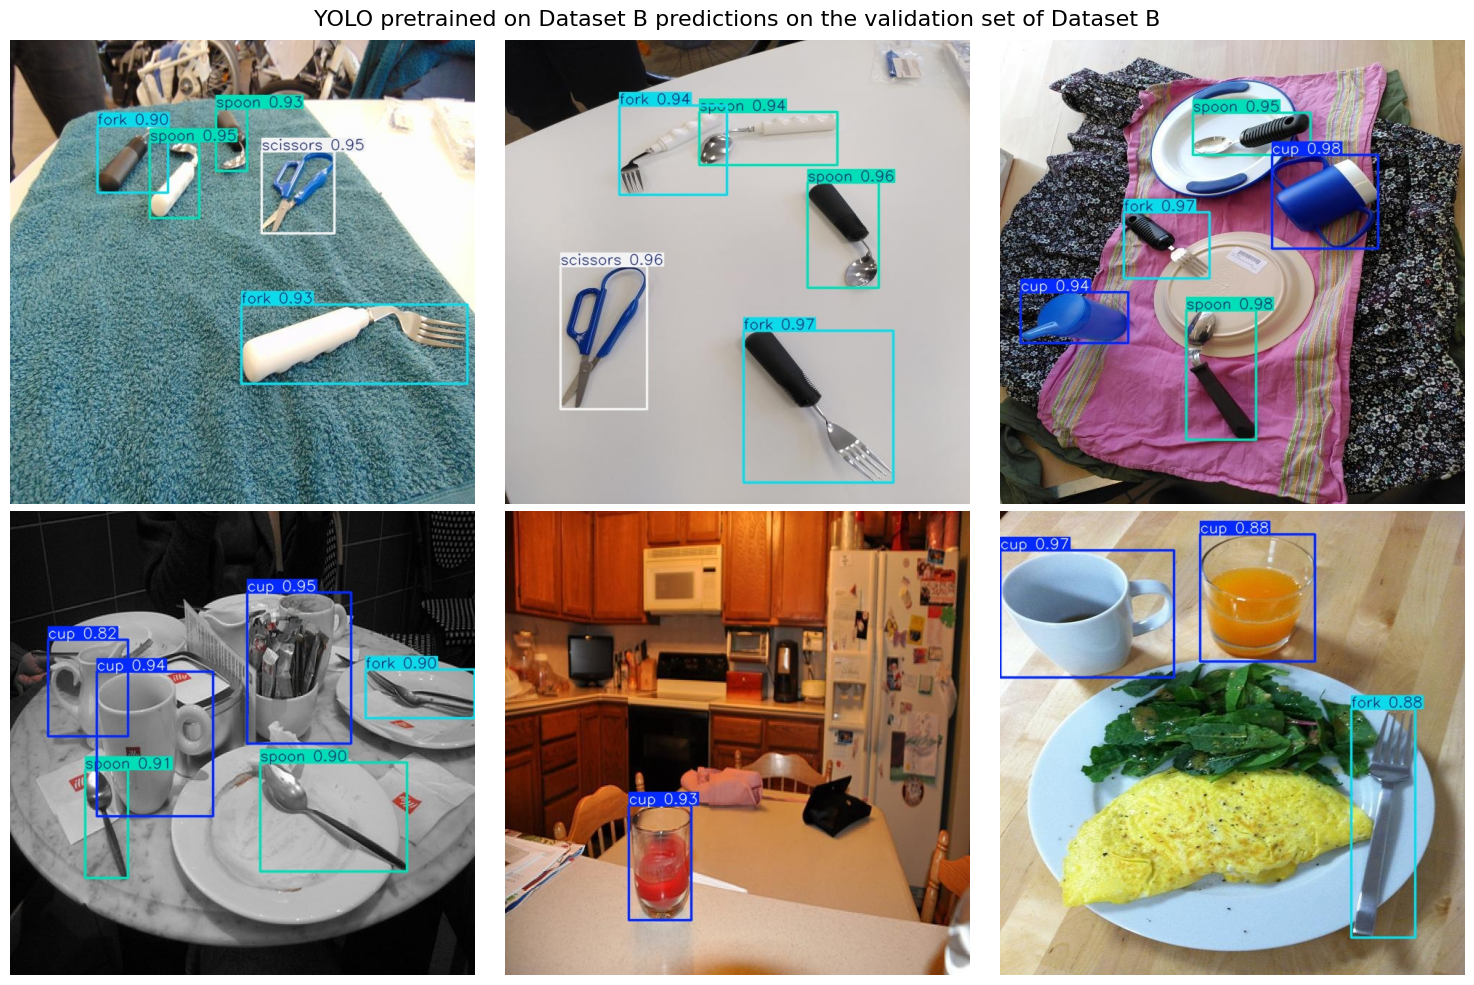

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

# List of image paths
image_paths = [
    "D:/HIRAC_dataset/runs/detect/predict5/DSC00456_JPG_jpg.rf.b7527c77cbffbb67105d26db72a9026a.jpg",
    "D:/HIRAC_dataset/runs/detect/predict5/IMG_20231219_104358_jpg.rf.1ca06508d3ff8321dece64049f72ceac.jpg",
    "D:/HIRAC_dataset/runs/detect/predict5/IMG_20240314_114137_jpg.rf.3fdca946ef1660fac1b803215dd4e7ef.jpg",
    "D:/HIRAC_dataset/runs/detect/predict5/000000192920_jpg.rf.2488e8ac1303c0f5456c54b231595963.jpg",
    "D:/HIRAC_dataset/runs/detect/predict5/000000057673_jpg.rf.da251fe24c389c4411ecf37a3d727ff6.jpg",
    "D:/HIRAC_dataset/runs/detect/predict5/000000063848_jpg.rf.b8b7e70125bd55fdea4dddd8b6d92a47.jpg"
]

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each image
for ax, img_path in zip(axes, image_paths):
    img = Image.open(img_path)  # Open the image
    ax.imshow(img)  # Show the image
    ax.axis('off')  # Hide axes

# Set a single title for the entire plot
fig.suptitle("YOLO pretrained on Dataset B predictions on the validation set of Dataset B", fontsize=16)

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the plot